# Importing necessary libraries

In [79]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from scipy import stats
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [80]:
# from google.colab import drive
# drive.mount('/content/drive')

In [81]:
df = pd.read_csv("C:/Users/mannu/Downloads/Fraud (1).csv")
# df = pd.read_csv("/content/drive/MyDrive/Shared Folder/Fraud_2.csv")

In [82]:
df.shape

(6362620, 11)

In [83]:
df.head(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [85]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [86]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [87]:
df_numeric = df.select_dtypes(exclude=object)
df_numeric.columns

Index(['step', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest',
       'newbalanceDest', 'isFraud', 'isFlaggedFraud'],
      dtype='object')

In [88]:
df_aplha = df.select_dtypes(object)
df_aplha.columns

Index(['type', 'nameOrig', 'nameDest'], dtype='object')

In [89]:
df.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

# Visualization

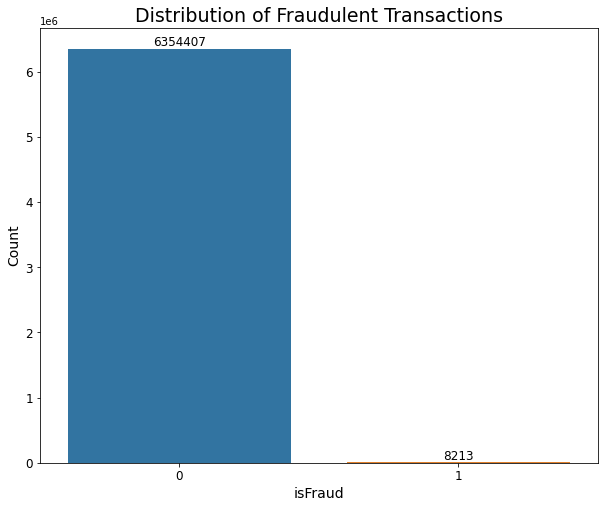

In [90]:
# Count the occurrences of each value in the 'isFraud' column
fraud_counts = df['isFraud'].value_counts()

#  Set the figure size
plt.figure(figsize=(10, 8))

# Create a bar plot
ax = sns.barplot(x=fraud_counts.index, y=fraud_counts.values)

# Add data labels
for i, count in enumerate(fraud_counts.values):
    ax.text(i, count, str(count), ha='center', va='bottom', fontsize=12)

# Set labels and title
plt.xlabel('isFraud', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.title('Distribution of Fraudulent Transactions', fontsize=19)

# Increase the font size of the tick labels
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Show the plot
plt.show()


Interpretation:  
Fraudlent transactions are less.  
From the above graph it is clear that our data is imbalanced.

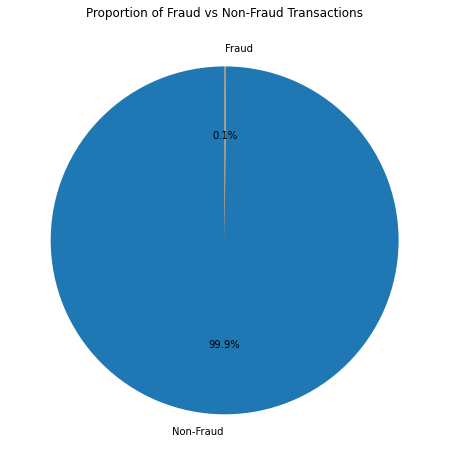

In [91]:
# Creating a pie chart to compare fraud vs non-fraud transactions
plt.figure(figsize=(8, 8))
fraud_counts = df['isFraud'].value_counts()
labels = ['Non-Fraud', 'Fraud']
plt.pie(fraud_counts, labels=labels, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Fraud vs Non-Fraud Transactions')
plt.show()


Interpretation:  
Fraudlent transaction is almost negligible compared to Non-fraud transactions

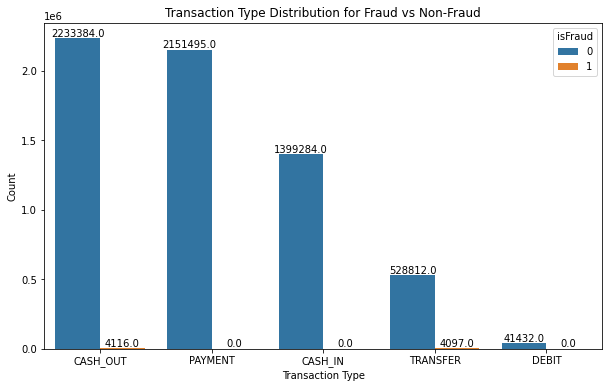

In [92]:
# Plotting bar graph to compare transaction types for fraud and non-fraud cases
plt.figure(figsize=(10, 6))
ax = sns.countplot(data=df, x='type', hue='isFraud', order=df['type'].value_counts().index)

# Add data labels
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Transaction Type Distribution for Fraud vs Non-Fraud')
plt.legend(title='isFraud')
plt.show()




Interpretations:  
- Most number of transactions are of Cash out and **most fraud transactions** too.  
- Transfer being the 2nd most fraud trasaction.  
- Besides no other transaction is having any fraud.

In [93]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [124]:
corr_matrix = df.corr()
corr_matrix["isFraud"].sort_values(ascending=False)  # By increasing one factor price will increase


isFraud           1.000000
amount            0.076688
isFlaggedFraud    0.044109
step              0.031578
type              0.020833
oldbalanceOrg     0.010154
newbalanceDest    0.000535
nameOrig         -0.000464
oldbalanceDest   -0.005885
newbalanceOrig   -0.008148
nameDest         -0.021963
Name: isFraud, dtype: float64

Strong +ve corelation is shown in Amount

In [94]:
# !pip install -U imbalanced-learn


In [95]:
# Initialize the StandardScaler
scaler = StandardScaler()
df_numeric_scaled = pd.DataFrame(scaler.fit_transform(df_numeric), columns=df_numeric.columns)
df_final = pd.concat([df_numeric_scaled, df.select_dtypes(include='object')], axis=1)
print(df_final.head())

       step    amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
0 -1.703042 -0.281560      -0.229810       -0.237622       -0.323814   
1 -1.703042 -0.294767      -0.281359       -0.285812       -0.323814   
2 -1.703042 -0.297555      -0.288654       -0.292442       -0.323814   
3 -1.703042 -0.297555      -0.288654       -0.292442       -0.317582   
4 -1.703042 -0.278532      -0.274329       -0.282221       -0.323814   

   newbalanceDest    isFraud  isFlaggedFraud      type     nameOrig  \
0       -0.333411  -0.035951       -0.001586   PAYMENT  C1231006815   
1       -0.333411  -0.035951       -0.001586   PAYMENT  C1666544295   
2       -0.333411  27.815483       -0.001586  TRANSFER  C1305486145   
3       -0.333411  27.815483       -0.001586  CASH_OUT   C840083671   
4       -0.333411  -0.035951       -0.001586   PAYMENT  C2048537720   

      nameDest  
0  M1979787155  
1  M2044282225  
2   C553264065  
3    C38997010  
4  M1230701703  


# Encoding categorical columns

In [97]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

# 'type', 'nameOrig', 'nameDest'

df['type'] = label_encoder.fit_transform(df['type'])
df['nameOrig'] = label_encoder.fit_transform(df['nameOrig'])
df['nameDest'] = label_encoder.fit_transform(df['nameDest'])

# Data Balancing

- Balanced the dataset using random under-sampling (RandomUnderSampler) to address the class imbalance issue.  

- Split the balanced dataset into train and test sets.


In [98]:
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


In [99]:
X = df.drop(['isFraud','nameOrig', 'nameDest'], axis=1)
y = df['isFraud']


In [100]:
# Apply random under-sampling to balance the data
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

# Training the data and fitting the model.

# *Logistic Regression*

In [101]:
# Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)


In [102]:
# Train a logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [103]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [112]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.904138770541692
Precision: 0.9136420525657072
Recall: 0.8918753817959683
F1 Score: 0.9026275115919629


The logistic regression model achieved the following performance metrics on the test set:

Accuracy: 0.9041,  the model correctly predicts approximately 90.41% of the transactions.    
Precision: 0.9136,  out of all the transactions predicted as fraudulent, approximately 91.36% of them are actually fraudulent.   
Recall: 0.8919,  the model correctly identifies approximately 89.19% of the actual fraudulent transactions.
  


# ROC Curve LR

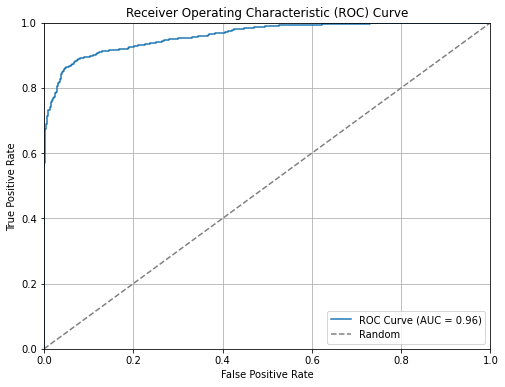

In [ ]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob = model.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Compute the Area Under the ROC Curve (ROC AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


In [ ]:
# Compute the AUROC score
auroc = roc_auc_score(y_test, y_prob)

# Print the AUROC score
print("AUROC Score:", auroc)

AUROC Score: 0.9603913887945268


AUROC score of 0.96 indicates the model's ability to correctly rank and differentiate between the two classes.

In [ ]:
from sklearn.model_selection import cross_val_score

# Define the logistic regression model
model = LogisticRegression()

# Perform cross-validation
cv_scores = cross_val_score(model, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())


Cross-Validation Scores: [0.91965916 0.92420091 0.90745814 0.89041096 0.85296804]
Mean CV Accuracy: 0.8989394423646836
Standard Deviation of CV Accuracy: 0.025791944708255313


- The model is able to predict the correct class with an accuracy of approximately 89.89%.  

- The standard deviation of the cross-validation accuracy is 0.025, which is low and implies consistent performance.

# *Decision Tree*

In [119]:
from sklearn.tree import DecisionTreeClassifier

# Select the features and target variable
X = df.drop(['isFraud','nameOrig', 'nameDest'], axis=1)
y = df['isFraud']

# Apply random under-sampling to balance the data
rus = RandomUnderSampler(random_state=42)
X_balanced, y_balanced = rus.fit_resample(X, y)

# Split the balanced dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

# Train a decision tree classifier
model2 = DecisionTreeClassifier()
model2.fit(X_train, y_train)

# Make predictions on the test set
y_pred_dt = model2.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dt)
precision = precision_score(y_test, y_pred_dt)
recall = recall_score(y_test, y_pred_dt)
f1 = f1_score(y_test, y_pred_dt)
roc_auc = roc_auc_score(y_test, y_pred_dt)

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)



Accuracy: 0.9917833231892879
Precision: 0.9866989117291415
Recall: 0.9969456322541234
F1 Score: 0.99179580674567


The Decision Tree model achieved the following performance metrics on the test set:

Accuracy: 0.9917,  the model correctly predicts approximately 99.17% of the transactions.    
Precision: 0.9866,  out of all the transactions predicted as fraudulent, approximately 98.66% of them are actually fraudulent.   
Recall: 0.9969,  the model correctly identifies approximately 99.69% of the actual fraudulent transactions.
  


# ROC for DT

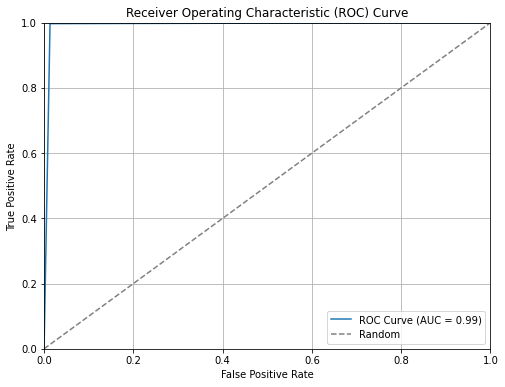

In [120]:
from sklearn.metrics import roc_curve, auc

# Compute the predicted probabilities for the positive class
y_prob_dt = model2.predict_proba(X_test)[:, 1]

# Compute the false positive rate (FPR), true positive rate (TPR), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_prob_dt)

# Compute the Area Under the ROC Curve (ROC AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

In [121]:
# Compute the AUROC score
auroc = roc_auc_score(y_test, y_prob_dt)

# Print the AUROC score
print("AUROC Score:", auroc)

AUROC Score: 0.99180210660614


In case of Decision Tree model, AUROC score of 0.99 indicates the model's ability to correctly rank and differentiate between the two classes.

In [122]:
# Perform cross-validation
cv_scores = cross_val_score(model2, X_balanced, y_balanced, cv=5, scoring='accuracy')

# Print the cross-validation scores
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())
print("Standard Deviation of CV Accuracy:", cv_scores.std())

Cross-Validation Scores: [0.54869142 0.88980213 0.93515982 0.99512938 0.99299848]
Mean CV Accuracy: 0.8723562440536903
Standard Deviation of CV Accuracy: 0.16651447854928594


Both models are performing good. However, Cross Validation metrics are better in Logistic regression.

Some techniques i can think of to prevent fraud:  
- Strong Authentication  
- Regular Security Updates
- Data Encryption
- Access Control
- Employee Training
- Incident Response Plan